In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as pl
import boolean2 as bl
import pandas as pd
import numpy as np
from time import gmtime, strftime

In [56]:
%run "rules.ipynb"
%run "utils.ipynb"

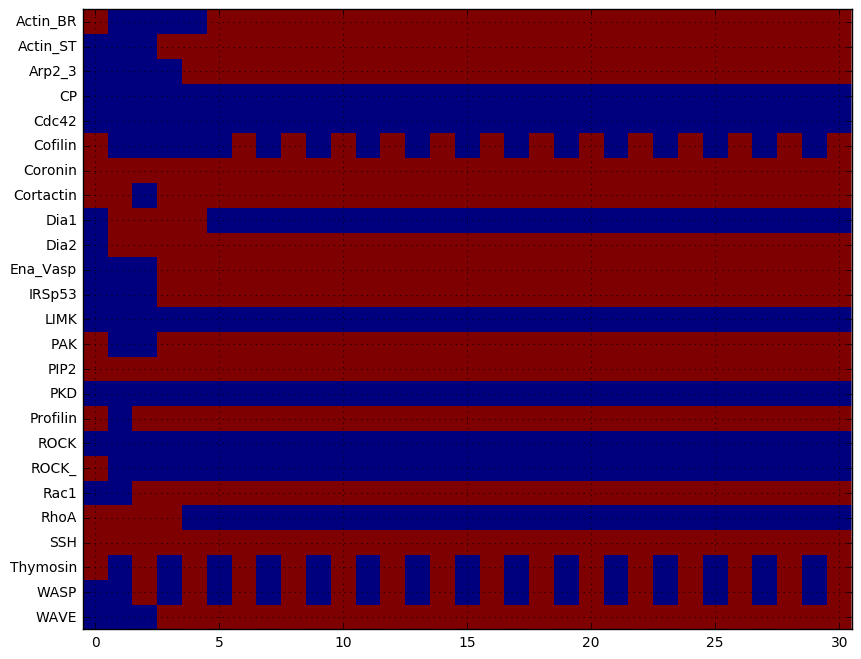

In [58]:
model = bl.Model(getRules(), mode='sync')
model.initialize(missing=bl.util.randbool)
model.iterate(steps=30)

pl.figure(figsize=(10,8))
plotModel(model.data);


In [57]:
model = bl.Model(getRules(), mode='sync')
for c in range(100):
    df = pd.DataFrame()
    for i in range(100):
        model.initialize(missing=bl.util.randbool)
        model.iterate(steps=30)

        dic = {}
        (cycle_start, cycle_len) = model.detect_cycles()
        dic['cycle_start'] = cycle_start
        dic['cycle_len'] = cycle_len
        for key, value in sorted(model.data.iteritems()):    
            dic['init_'+key] = int(value[0])
            dic['cycle_'+key] = ''.join(map(lambda x: str(x*1), value[cycle_start:(cycle_start + cycle_len)]))
        dic['data'] = model.data
        df = df.append(pd.Series(dic), ignore_index=True)

    df.to_pickle("data/chunk-%s.bin" % strftime("%Y-%m-%d-%H-%M-%S", gmtime()))